<a href="https://colab.research.google.com/github/dtphuong2612/Data_Preparing/blob/main/homework06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics


In [6]:
data = read_csv('/content/drive/MyDrive/DSEB_61/Data Pre/Data/winequality-red.csv')

In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


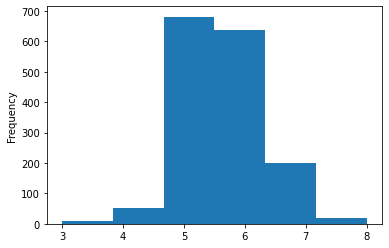

In [12]:
data['quality'].plot(kind='hist', bins=6)

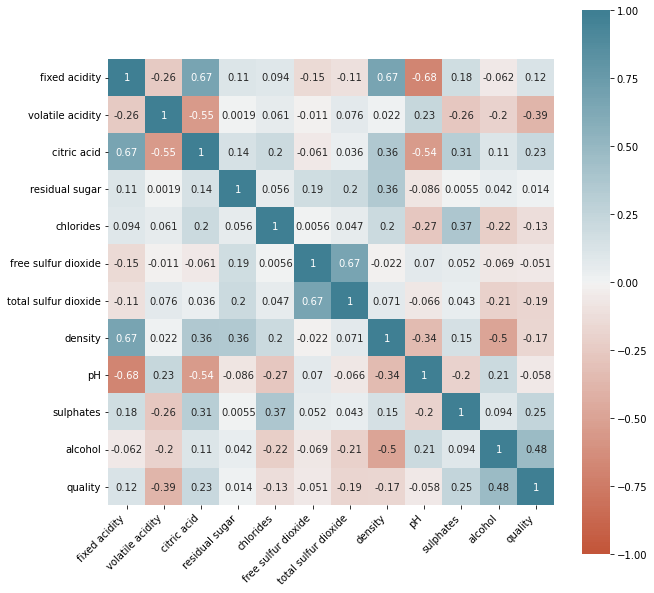

In [14]:
cor = data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(
    cor, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


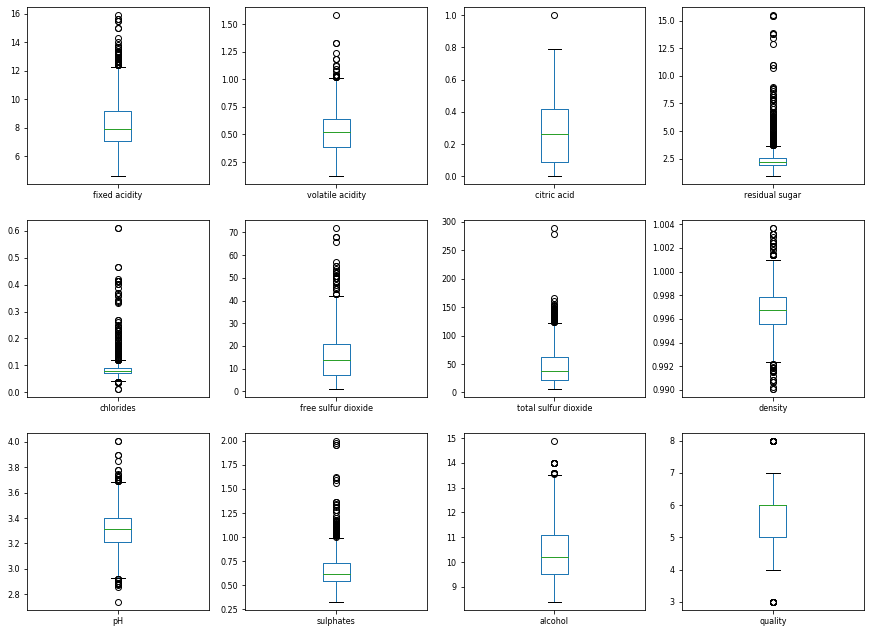

In [18]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, ax=ax)
pyplot.show()

In [28]:
dt = data.values
X = dt[:, 0:11]
Y = dt[:, 11]

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.3, random_state=42)

In [29]:
X_train.shape, X_validation.shape

((1119, 11), (480, 11))

In [30]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
model.coef_


array([ 2.34704718e-02, -1.09961969e+00, -2.47859776e-01,  7.73785620e-03,
       -1.67359251e+00,  4.55041815e-03, -3.26389168e-03, -1.42395563e+01,
       -3.19247444e-01,  8.12824701e-01,  2.91991158e-01])

In [43]:
model.intercept_

17.9625783392325

In [31]:
pred = model.predict(X_validation)

In [34]:
wine = pd.DataFrame({'Quality':Y_validation,'Predict':pred})
wine['Quality']= round(wine['Predict'],2)
wine.head()

,Quality,Predict
0,5.36,5.356763
1,5.09,5.090715
2,5.63,5.625538
3,5.45,5.448861
4,5.74,5.744784


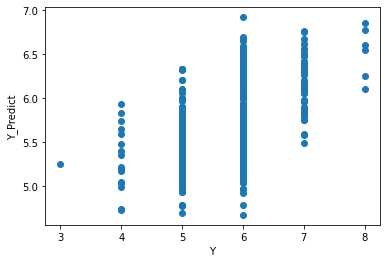

In [44]:
fig, ax = plt.subplots()
ax.scatter(Y_validation,pred)
ax.set_xlabel('Y')
ax.set_ylabel('Y_Predict')
plt.show()

In [41]:
print('MAE:', metrics.mean_absolute_error(Y_validation, pred))
print('MSE:', metrics.mean_squared_error(Y_validation, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_validation, pred)))
print('R-Squared: ',model.score(X_train,Y_train))

MAE: 0.5133956082451127
MSE: 0.4112348717504203
RMSE: 0.6412759715991394
R-Squared:  0.36119824413213175
